In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
import time
from scipy import signal

### Task 1

In [2]:
def dft(xt):
    # extract data length, N
    N = xt.size
    # build a fourier matrix by multiplying appropriate matricies
    k,l = np.meshgrid(np.arange(N), np.arange(N))
    F = np.matmul(l, k) / N
    # raise complex exponential to powers in F
    w = np.exp(-2*np.pi*1j/N)
    W = np.power(w, F)
    # simple matrix multiplication to extract dft
    Xw = np.matmul(W, xt)
    
    return Xw

In [3]:
x = np.random.normal(size=100)+1j*np.random.normal(size=100)

In [4]:
assert(dft(x).all() == np.fft.fft(x).all())

### Task 2

In [5]:
t0 = time.time()
dft(x);
t1 = time.time()
t1-t0

0.003838062286376953

In [6]:
t0 = time.time()
np.fft.fft(x);
t1 = time.time()
t1-t0

0.00047898292541503906

In [8]:
Ns = np.array([i**2 for i in range(5, 45)])

In [9]:
dft_times = np.zeros(Ns.size)
for i in range(Ns.size):
    n = Ns[i]
    xl = np.random.normal(size=n)+1j*np.random.normal(size=n)
    t0 = time.time()
    dft(xl)
    t1 = time.time()
    dft_times[i] = t1-t0

In [10]:
Nsf = np.array([i**2 for i in range(5, 500)])
fft_times = np.zeros(Nsf.size)
for i in range(Nsf.size):
    n = Nsf[i]
    xl = np.random.normal(size=n)+1j*np.random.normal(size=n)
    t0 = time.time()
    np.fft.fft(xl)
    t1 = time.time()
    fft_times[i] = t1-t0

<IPython.core.display.Javascript object>


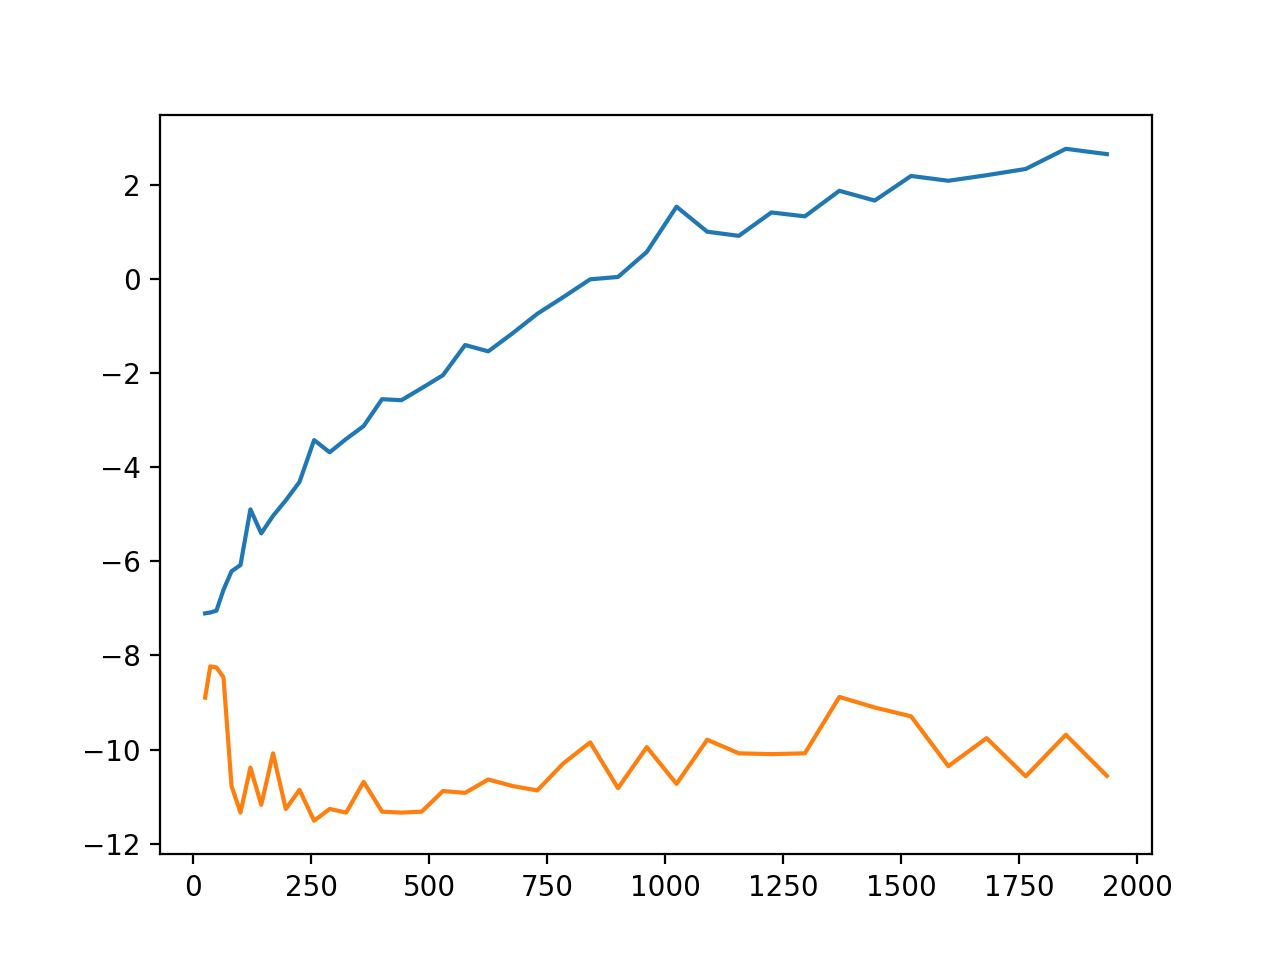

In [11]:
plt.figure()
plt.plot(Ns, np.log(dft_times))
plt.plot(Ns, np.log(fft_times[:dft_times.shape[0]]))

<IPython.core.display.Javascript object>


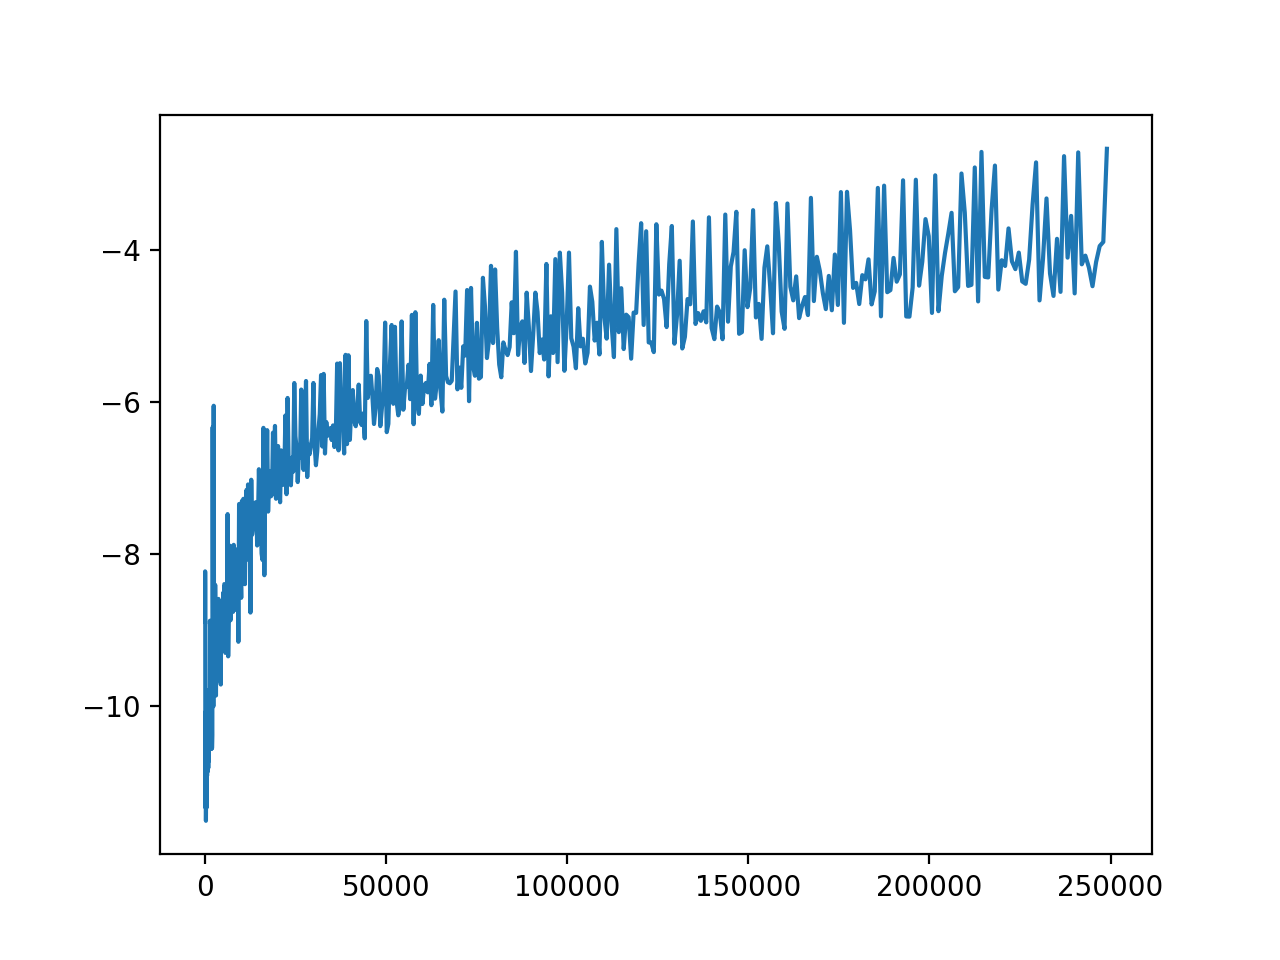

In [12]:
plt.figure()
plt.plot(Nsf, np.log(fft_times))

### Task 3

In [13]:
theta = 0.2*np.pi
T = 1
M = 100
t = np.arange(M)
y = np.sin(t*theta/T)
wind = signal.windows.hamming(M)

<IPython.core.display.Javascript object>


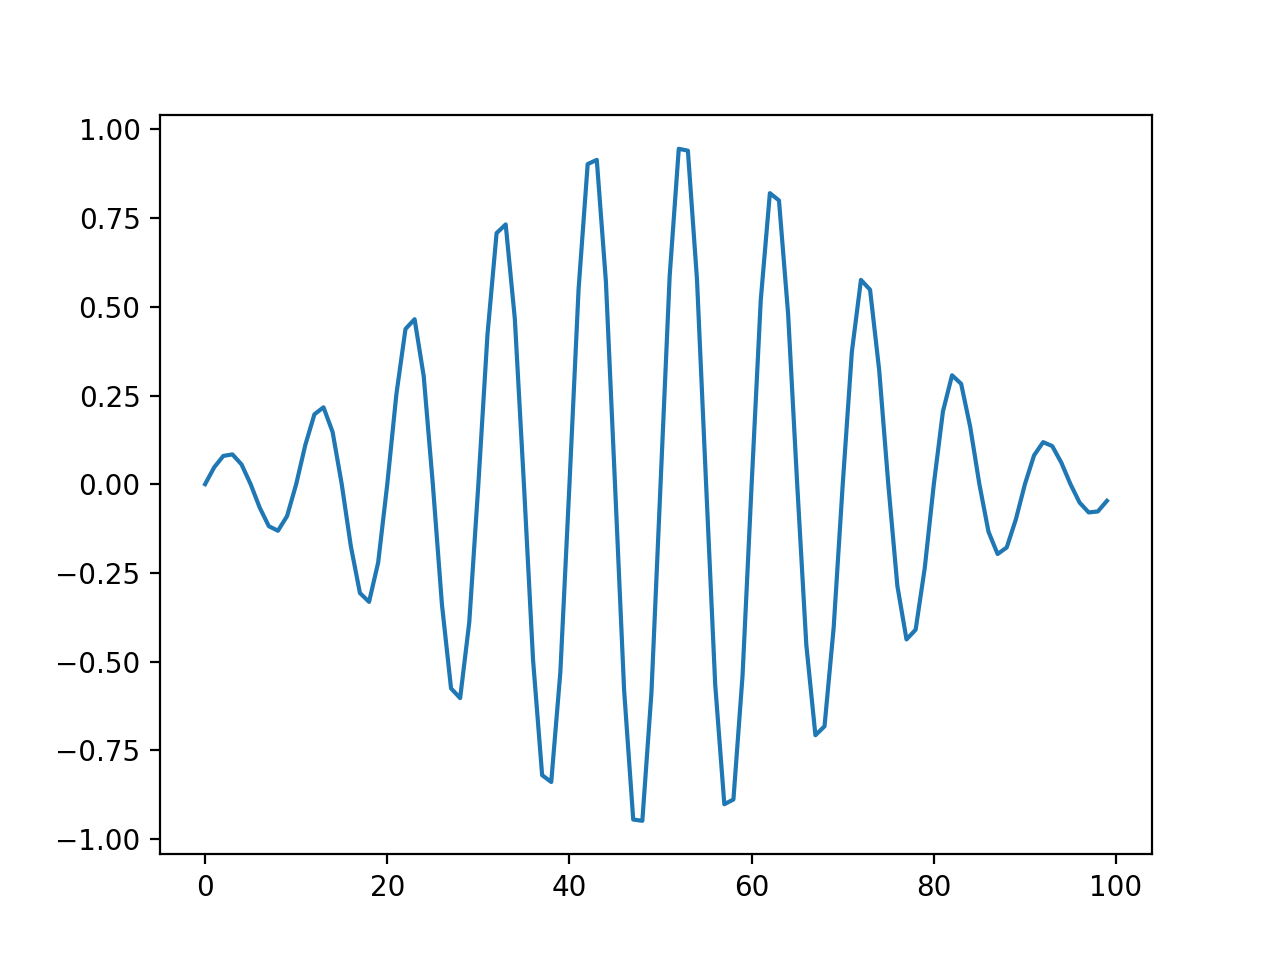

In [14]:
plt.figure()
plt.plot(np.arange(M), y*wind)

<IPython.core.display.Javascript object>


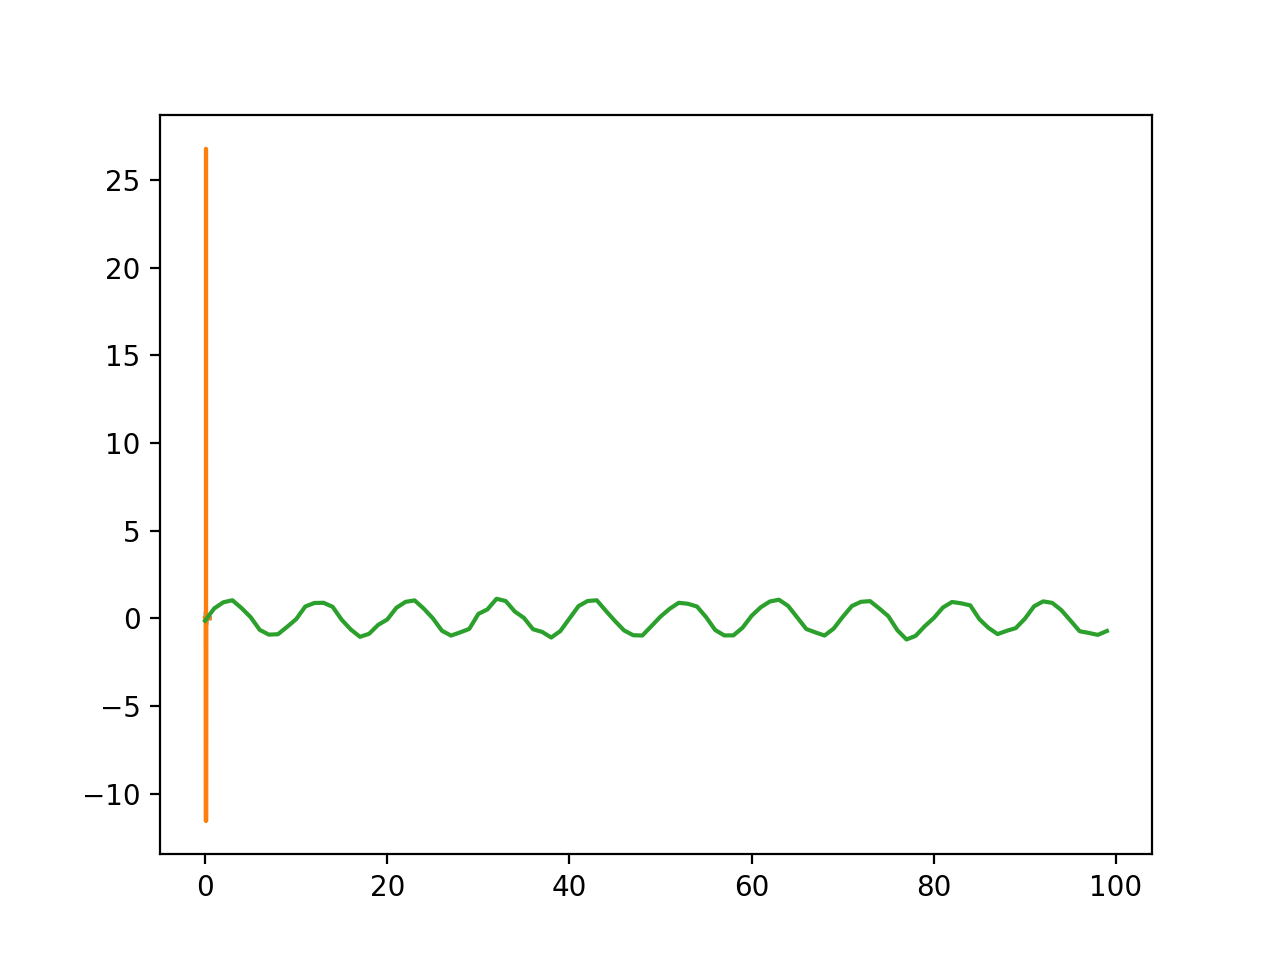

In [15]:
plt.figure()
plt.plot(np.fft.fftfreq(M)[:int(M/2)], np.fft.fft(y*wind).real[:int(M/2)], label='Real')

In [16]:
plt.figure
plt.plot(np.fft.fftfreq(M)[:int(M/2)], -np.fft.fft(y*wind).imag[:int(M/2)], label='Imag')

### Task 4

In [17]:
y_c = y + np.sqrt(0.01)*np.random.normal(size=M)

In [18]:
plt.plot(t, y_c)

<IPython.core.display.Javascript object>


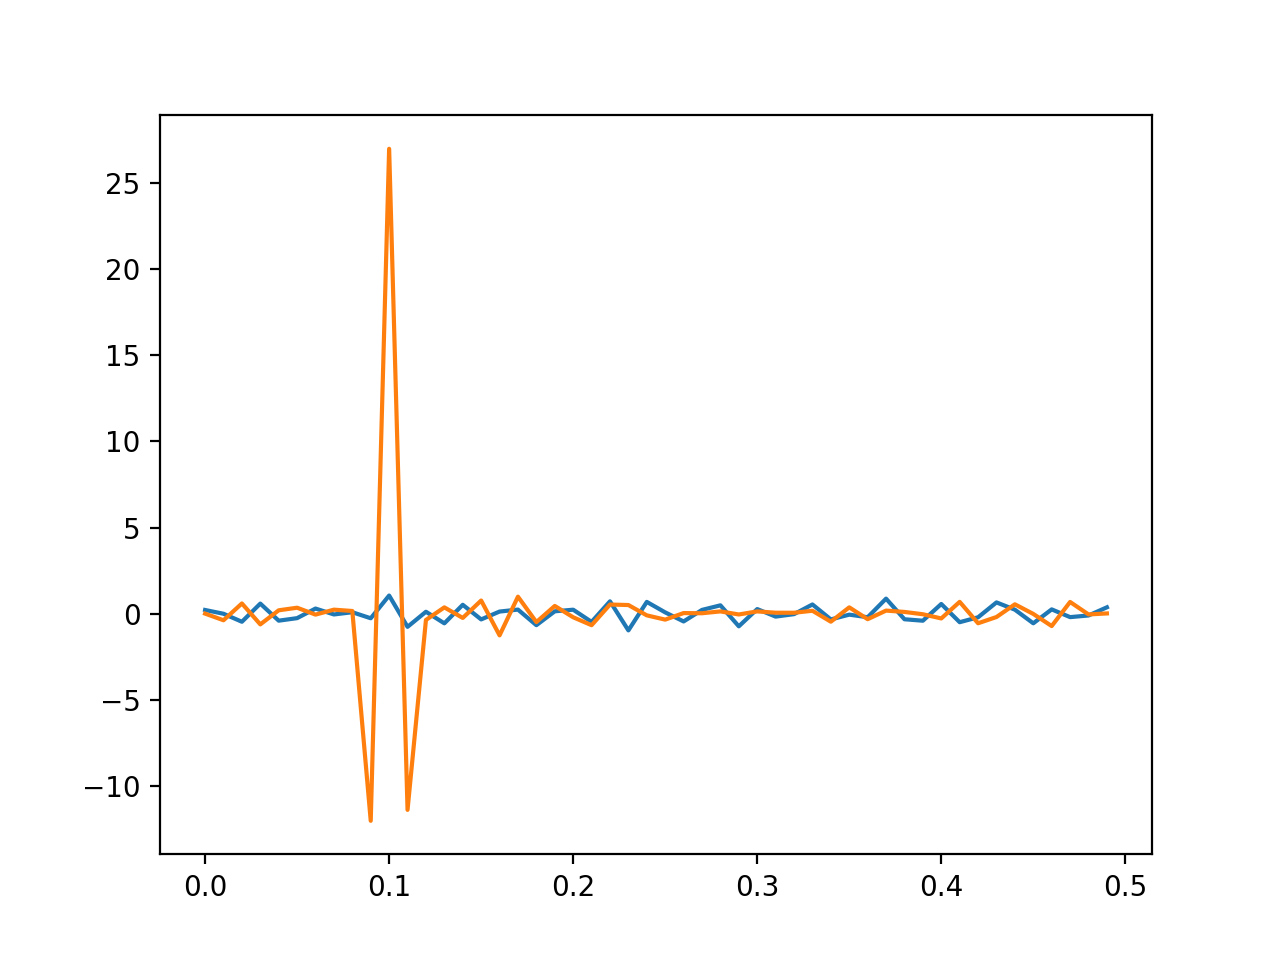

In [19]:
plt.figure()
plt.plot(np.fft.fftfreq(M)[:int(M/2)], np.fft.fft(y_c*wind).real[:int(M/2)], label='Real')

In [20]:
plt.figure
plt.plot(np.fft.fftfreq(M)[:int(M/2)], -np.fft.fft(y_c*wind).imag[:int(M/2)], label='Imag')

### Task 5

In [35]:
A = 1
B = 1
M = 100
T = 1
theta = 0.6*np.pi
n = np.arange(M)
an = A*n + B
yn = an * np.exp(1j * theta * n)

<IPython.core.display.Javascript object>


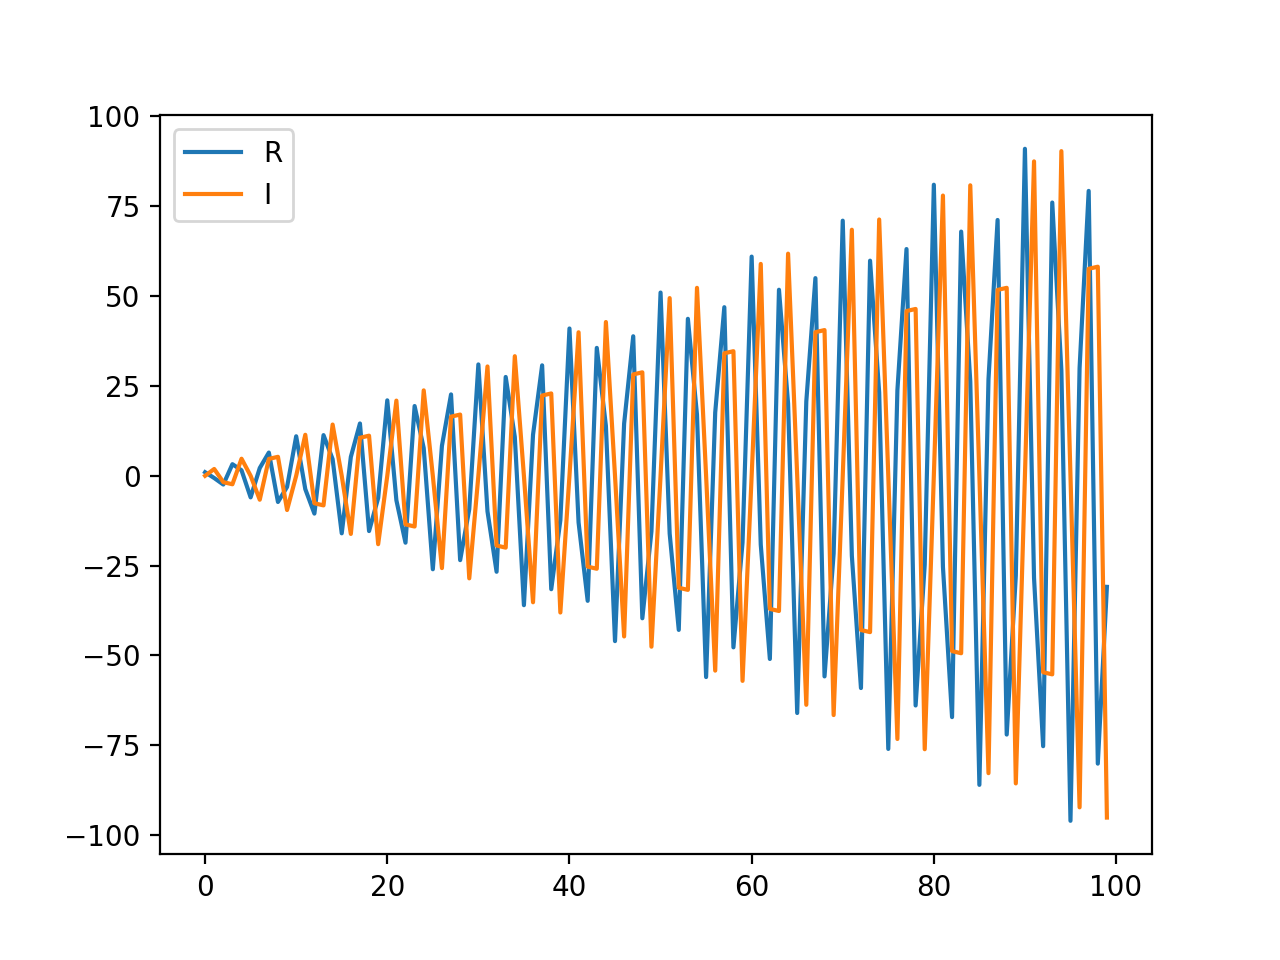

In [36]:
plt.figure()
plt.plot(n, yn.real, label='R')
plt.plot(n, yn.imag, label='I')
plt.legend()

<IPython.core.display.Javascript object>


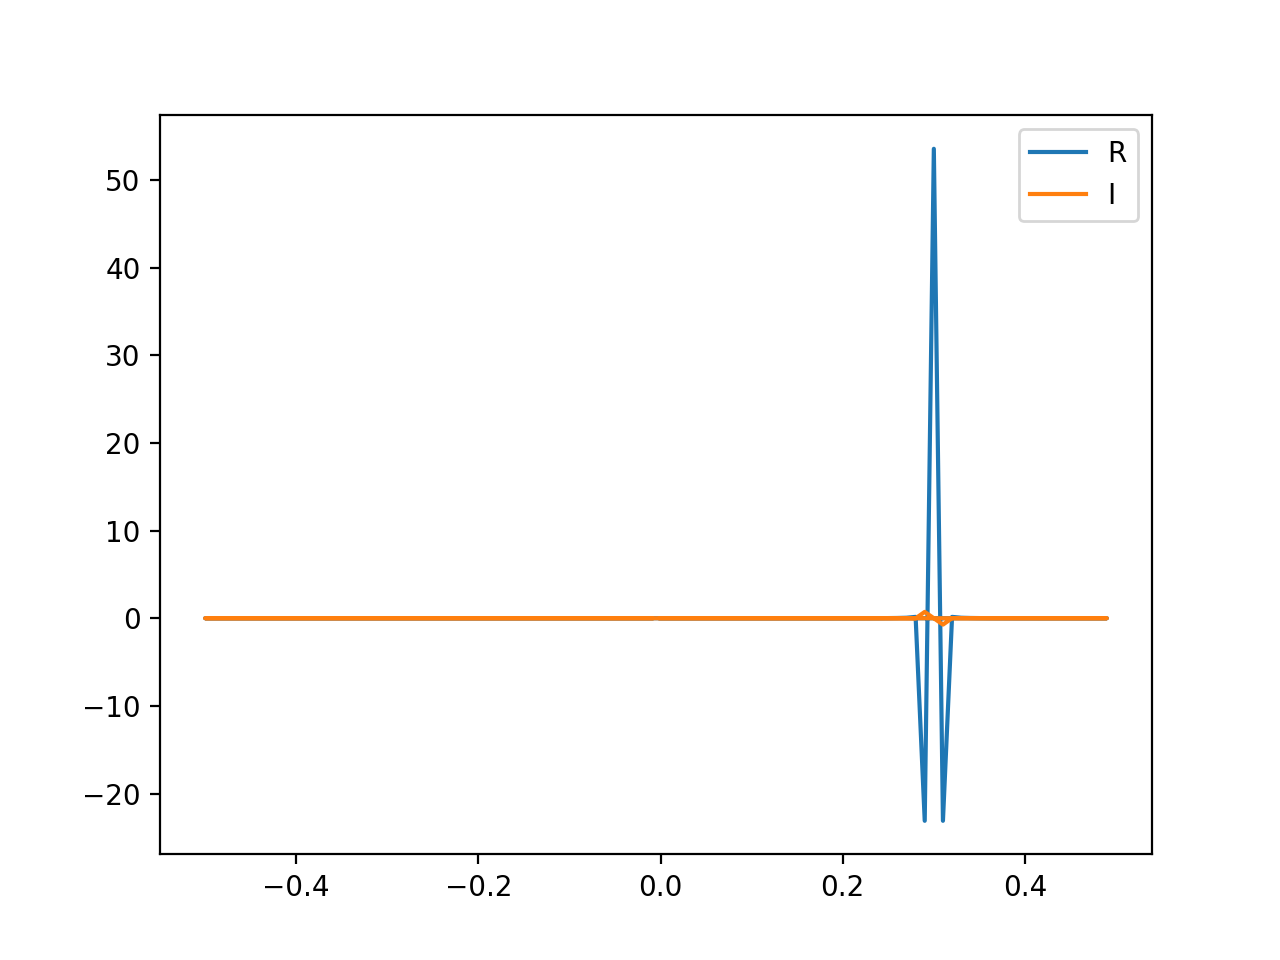

In [37]:
wind = signal.windows.hamming(M)
plt.figure()
plt.plot(np.fft.fftfreq(M), np.fft.fft(np.exp(1j * theta * n)*wind).real, label='R')
plt.plot(np.fft.fftfreq(M), np.fft.fft(np.exp(1j * theta * n)*wind).imag, label='I')
plt.legend()

<IPython.core.display.Javascript object>


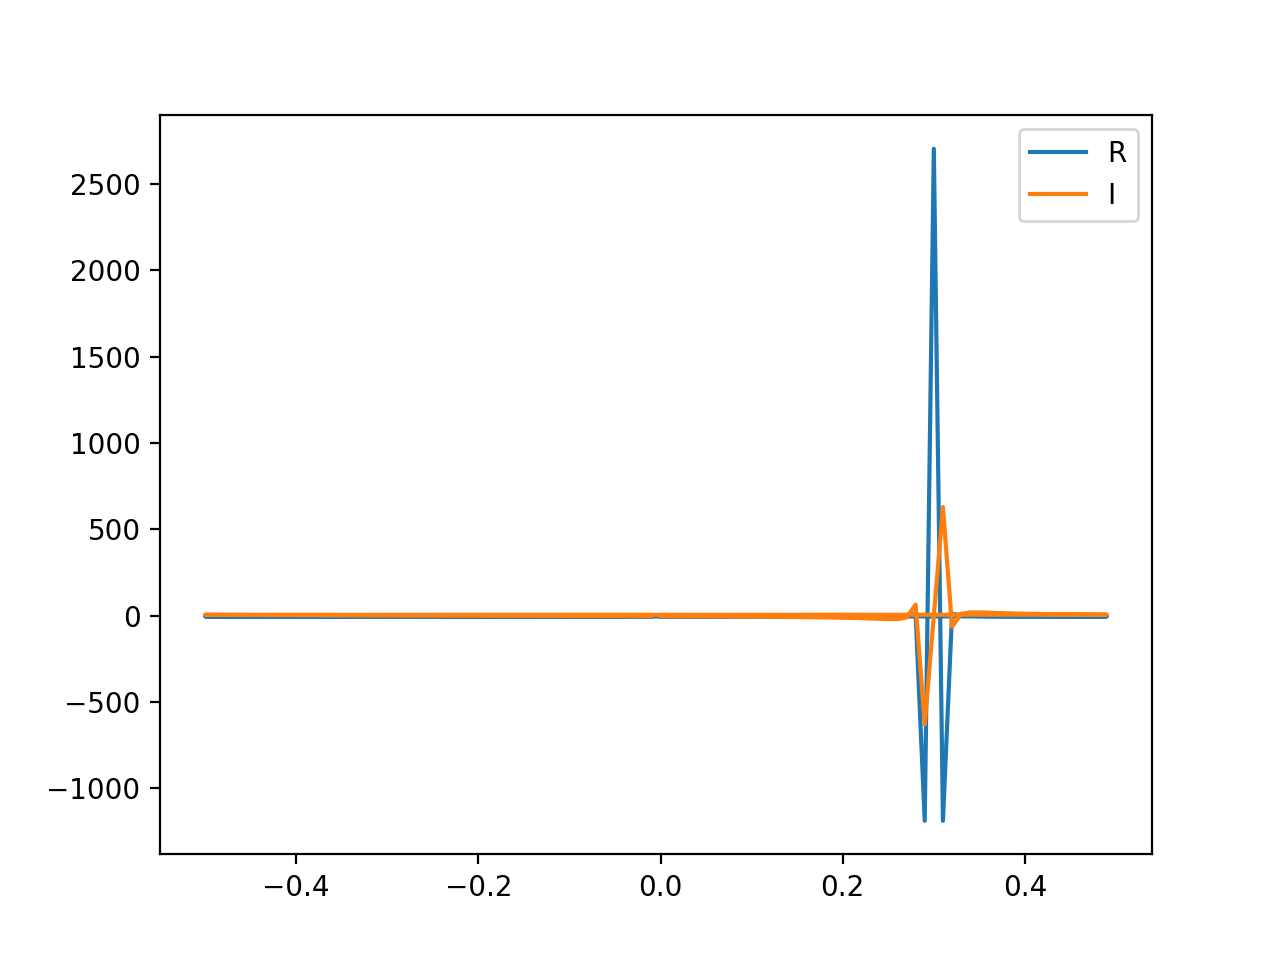

In [38]:
plt.figure()
plt.plot(np.fft.fftfreq(M), np.fft.fft(yn*wind).real, label='R')
plt.plot(np.fft.fftfreq(M), np.fft.fft(yn*wind).imag, label='I')
plt.legend()

In [39]:
beta = 0.01
phi = 0.01
bn = 1 + beta * np.sin(phi*n)
zn = bn * np.exp(1j * theta * n)

<IPython.core.display.Javascript object>


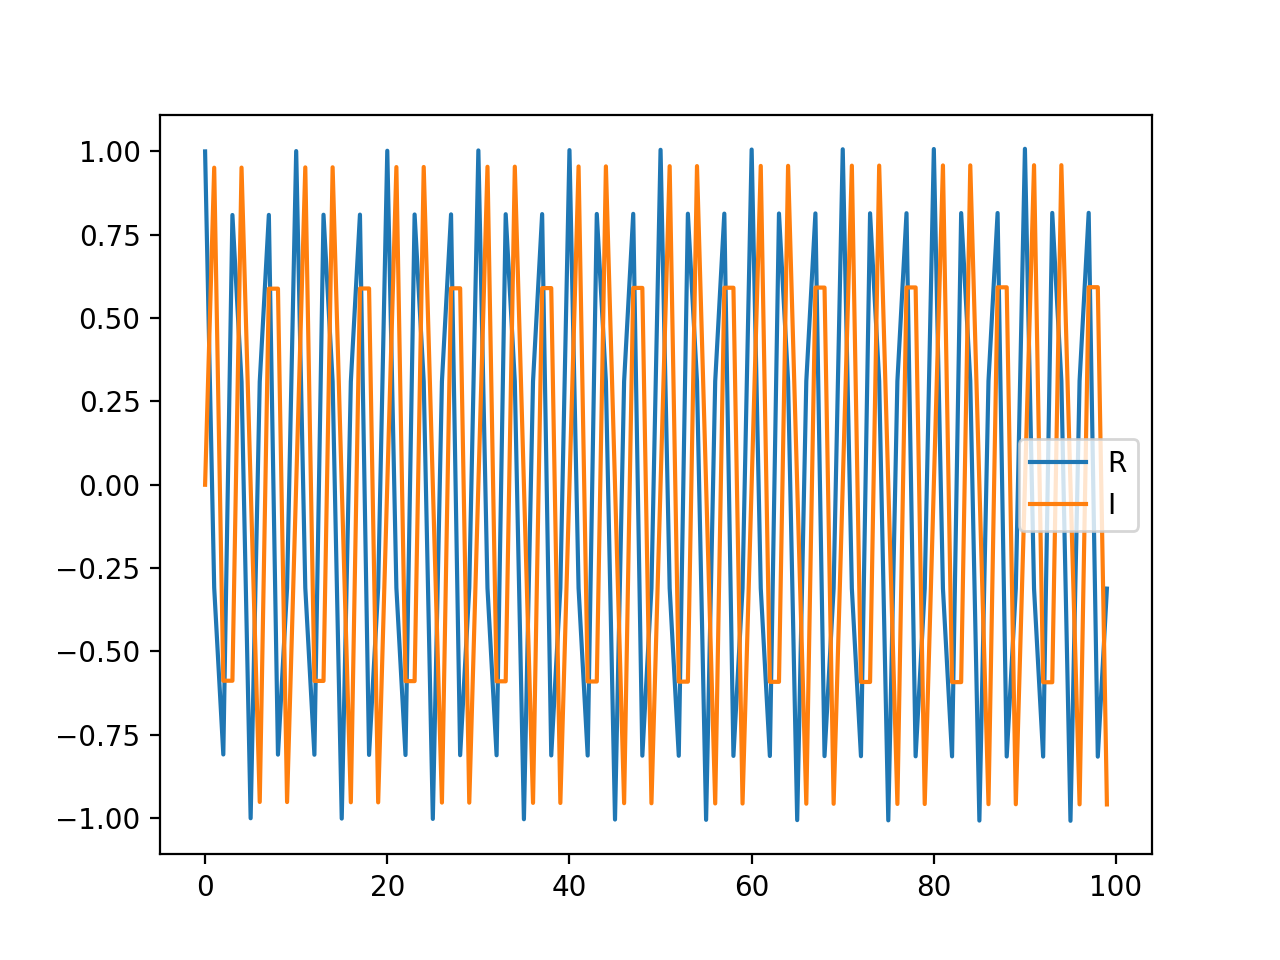

In [40]:
plt.figure()
plt.plot(n, zn.real, label='R')
plt.plot(n, zn.imag, label='I')
plt.legend()

<IPython.core.display.Javascript object>


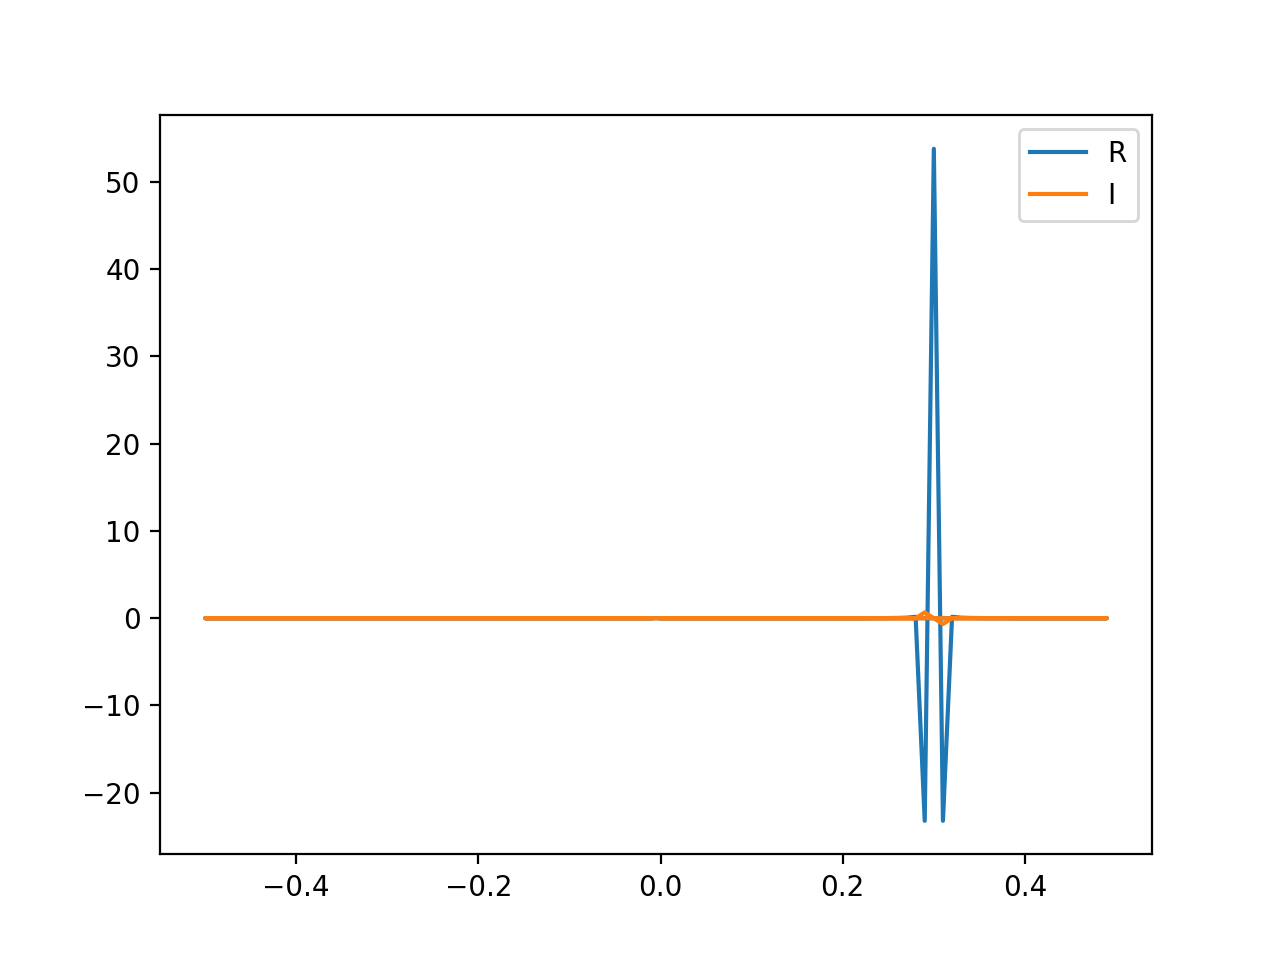

In [41]:
plt.figure()
plt.plot(np.fft.fftfreq(M), np.fft.fft(zn*wind).real, label='R')
plt.plot(np.fft.fftfreq(M), np.fft.fft(zn*wind).imag, label='I')
plt.legend()

In [66]:
cn = np.zeros(M)
cn[0] = 0
for i in range(1, M):
    cn[i] = cn[i-1] + np.sqrt(0.1)*np.random.normal()

<IPython.core.display.Javascript object>


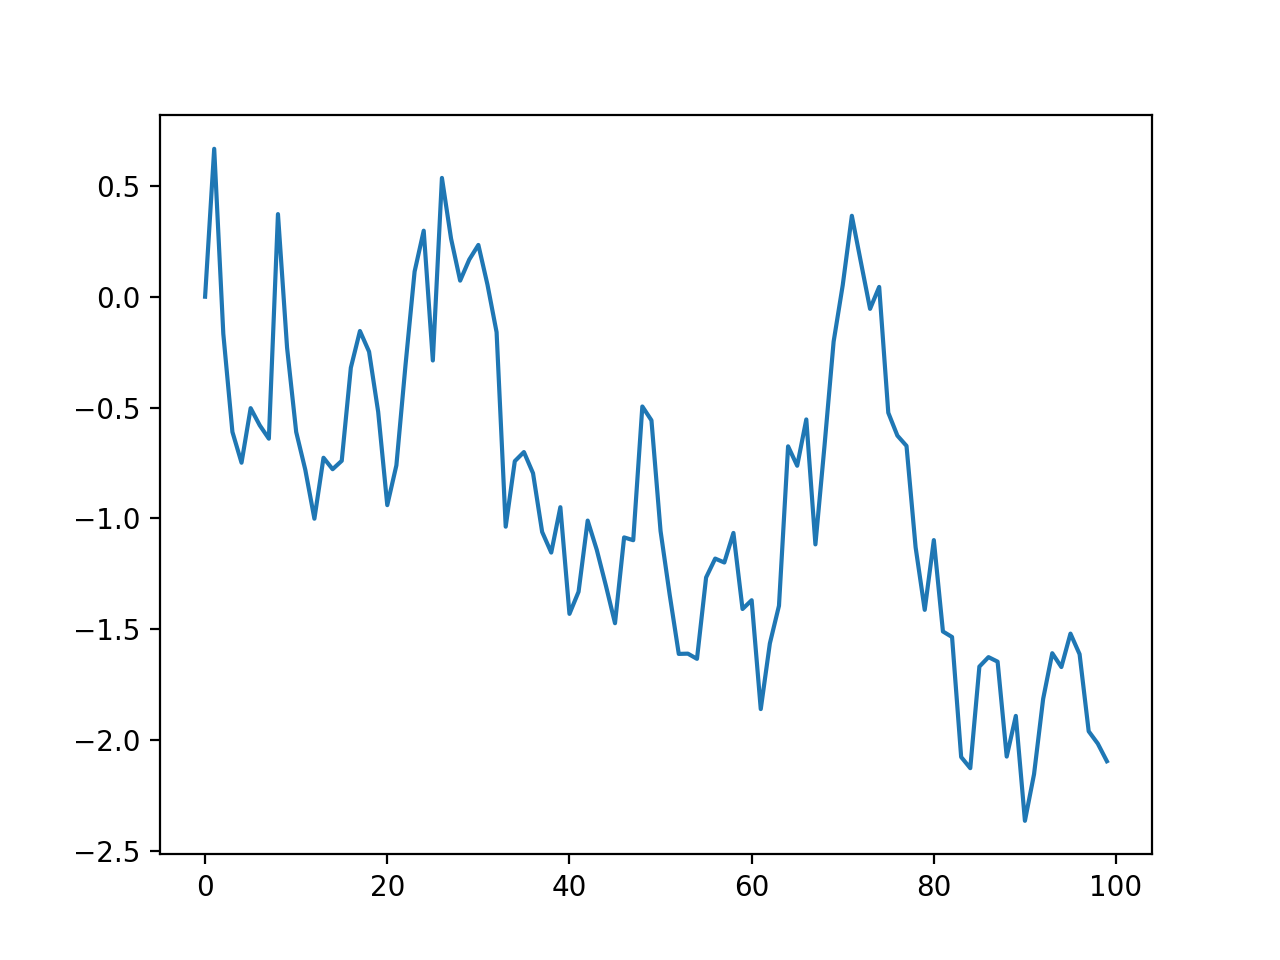

In [67]:
plt.figure()
plt.plot(n, cn)

<IPython.core.display.Javascript object>


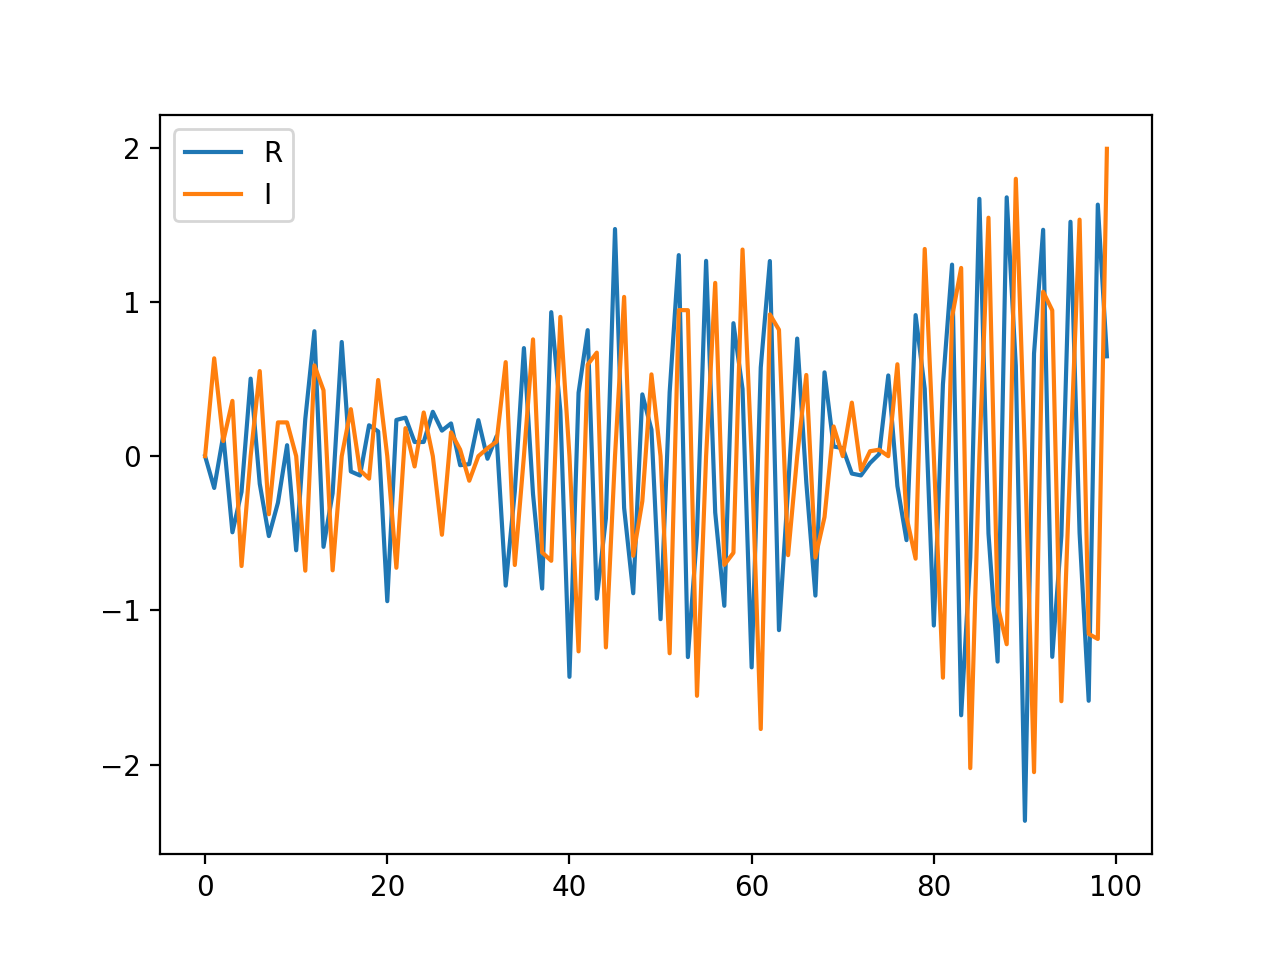

In [68]:
xn = cn * np.exp(1j * theta * n)
plt.figure()
plt.plot(n, xn.real, label='R')
plt.plot(n, xn.imag, label='I')
plt.legend()

<IPython.core.display.Javascript object>


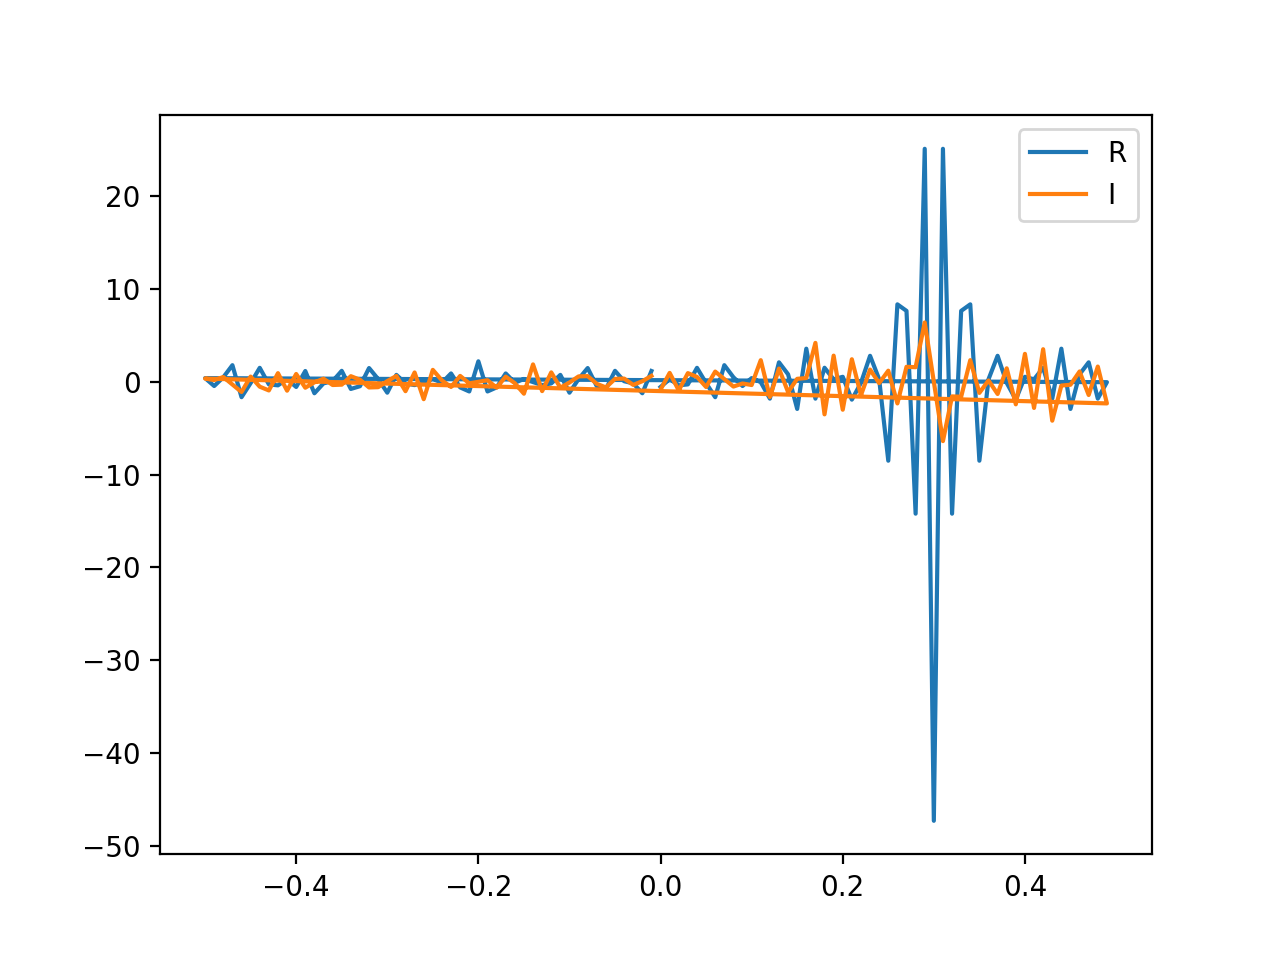

In [69]:
plt.figure()
plt.plot(np.fft.fftfreq(M), np.fft.fft(xn*wind).real, label='R')
plt.plot(np.fft.fftfreq(M), np.fft.fft(xn*wind).imag, label='I')
plt.legend()